In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import keras

from keras.models import load_model
from keras.layers import Embedding, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(precision=4, suppress=True)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../datas.csv', sep=',', index_col='id')

subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming',
            'stat', 'pde', 'functional', 'variational', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]

df['mean'] = df[subjects].mean(axis=1)
df['round'] = np.rint(df['mean'].values)

df.loc[df['year'] == 13, 'k'] = 0.8
df.loc[df['year'] == 14, 'k'] = 0.5
df.loc[df['year'] >= 15, 'k'] = 0.3

In [3]:
train_df = df.loc[df['year'] <= 15]

x_train = train_df[['k', 'ege']].values
y_train = train_df['round'].values - 3

test_df = df.loc[df['year'] > 15]
x = test_df[['k', 'ege']].values
y = test_df['round'].values - 3


In [4]:
model = load_model("enrollee_model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 2)           2048      
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               67072     
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 387       
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 12        
Total params: 69,519
Trainable params: 69,519
Non-trainable params: 0
_________________________________________________________________


In [6]:
df_16 = df.loc[df['year'] == 16][['ege', 'k', 'round']]
x_test_16 = df_16[['k', 'ege']].values
y_test_16 = df_16['round'].values - 3

one_hot_labels_16 = keras.utils.to_categorical(y_test_16, num_classes=3)

loss_and_metrics_16 = model.evaluate(x_test_16, one_hot_labels_16)
print("2016")
print(loss_and_metrics_16)

df_17 = df.loc[df['year'] == 17][['ege', 'k', 'round']]
x_test_17 = df_17[['k', 'ege']].values
y_test_17 = df_17['round'].values - 3

one_hot_labels_17 = keras.utils.to_categorical(y_test_17, num_classes=3)

loss_and_metrics_17 = model.evaluate(x_test_17, one_hot_labels_17)

print("2017")
print(loss_and_metrics_17)

20/20 [==============================] - 0s 17ms/step
2016
[0.8946971893310547, 0.699999988079071]
20/20 [==============================] - 0s 170us/step
2017
[1.0736539363861084, 0.550000011920929]


### Пронозирование успеваемости абитуриентов за 2016 год

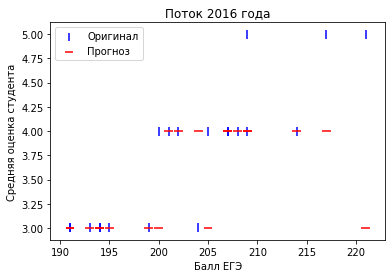

In [7]:
df_16 = df.loc[df['year'] == 16][['ege', 'k', 'round']]
x_test_16 = df_16[['k', 'ege']].values
y_test_16 = df_16['round'].values - 3

y_predict_16 = model.predict(x_test_16)
y_predict_16 = list(map(lambda y : y.argmax()+3, y_predict_16))

marker_size = [80 for i in range(len(x))]

plt.scatter(x_test_16[:, 1], y_test_16+3, marker='|', color='blue', s=marker_size)
plt.scatter(x_test_16[:, 1], y_predict_16, marker='_', color='red', s=marker_size)

plt.title('Поток 2016 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка студента')
plt.legend(['Оригинал', 'Прогноз']);
plt.savefig('enrollee_predict_2016.png', dpi=300)

### Пронозирование успеваемости абитуриентов за 2017 год

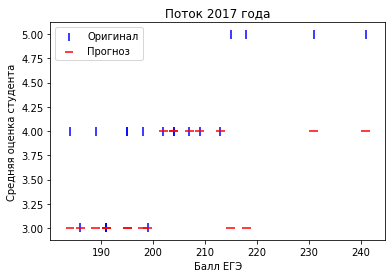

In [8]:
df_17 = df.loc[df['year'] == 17][['ege', 'k', 'round']]
x_test_17 = df_17[['k', 'ege']].values
y_test_17 = df_17['round'].values - 3

y_predict_17 = model.predict(x_test_17)
y_predict_17 = list(map(lambda y : y.argmax()+3, y_predict_17))

marker_size = [80 for i in range(len(x))]

plt.scatter(x_test_17[:, 1], y_test_17+3, marker='|', color='blue', s=marker_size)
plt.scatter(x_test_17[:, 1], y_predict_17, marker='_', color='red', s=marker_size)

plt.title('Поток 2017 года')
plt.xlabel('Балл ЕГЭ')
plt.ylabel('Средняя оценка студента')
plt.legend(['Оригинал', 'Прогноз']);
plt.savefig('enrollee_predict_2017.png', dpi=300)